# Set up file 

In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable  
import matplotlib
import scipy
import scipy.interpolate
import sys
sys.path.insert(0, '/srv/ccrc/data06/z5145948/Python/python_from_R/Holocene/sampled_models/plotting_files/')
from plott import plott
import scipy.interpolate
from mpl_toolkits.basemap import Basemap
matplotlib.use('agg')
from Cross_section import Cross_section
from Proxy_graph_masked import Proxy_graph
import Config
from Map_plot import Map_plot
from collections import Counter
import scipy.stats as stats
from pylab import *
rcParams['legend.numpoints'] = 1
from matplotlib.ticker import MaxNLocator
import time
from IPython import embed
import os
from matplotlib import gridspec
import re
from matplotlib.colors import ListedColormap, LinearSegmentedColormap

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['text.latex.preamble'] = [
    r'\usepackage{wasysym}',
    r'\usepackage{textcomp}']

fontsize = 18

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 1200

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

%matplotlib inline

/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py:14: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/home/z5145948/miniconda2/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/home/z5145948/miniconda2/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/z5145948/miniconda2/lib/python2.7/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/z5145948/miniconda2/lib/python2.7/site-packages/ipykernel/

In [2]:
# Define the d13C contour characterisics
cmap = 'gist_rainbow'
d13C_color_min = -0.5
d13C_color_max = 1.25
# d13C_color_levels = np.arange(d13C_color_min, d13C_color_max, (d13C_color_max-(d13C_color_min))/50)

# Import standardised latitudes and depths
lat_standardised = np.genfromtxt('/srv/ccrc/data06/z5145948/Moving_water_mass/Data/latitude_levels.csv', delimiter=',')
dep_standardised = np.genfromtxt('/srv/ccrc/data06/z5145948/Moving_water_mass/Data/depth_levels.csv', delimiter=',')

# The length of time of each slice
slice_width = 1

# tolerance around average depth deviation
tol = 300

# File saving location
overleaf_loc = '/home/z5145948/Dropbox/Apps/Overleaf/Paper_2/Figures'

# Holocene and LIG peak regions for T-test

Hol_max_limits = (2,8)
LIG_max_limits = (119,126)

In [3]:
####3 reading data function

def read_data(folder):

    # Import simulation details (summary) as dataframe
    summary = pd.read_csv(folder + '_summary.txt', delimiter = ' ')

    # Import simulation outputs
    fh = Dataset(folder + 'output.nc')
    proxy_simulations = fh.variables['var1_1'][:] 

    # Import samples (proxy data)
    samples = pd.read_csv( folder + '_samples.txt', delimiter = ' ')

    # Drop all unnecessary rows in summary
    summary = summary.drop(['type', 'Row.names', 'reps', 'model', 'dataset', 'filename', 'success.rate'], axis = 1)

    # Convert run.no to netcdf file index
    summary['run.no'] = summary['run.no'] - 1
    samples['run.no'] = samples['run.no'] - 1
    
    return(proxy_simulations, samples, summary)

In [4]:
#### import some UVic data

# Set up graph

dep = dep_standardised
lat = lat_standardised                                                                                                                                                                                                                     

zo_min = 0.6
zo_max = 1.3

fig1 = plt.figure(1)
axHC = plt.subplot2grid((2,1), (0,0))

# get the model output for the mask

axHC, var_U, lat_U, lon_U, tim_U, dep_U, data_form_U, mask_U = plott('UVic','/srv/ccrc/data06/z5145948/UVic/PI/','O_dic13',9000,10000,'cross',fig1,axHC,0,5000,'y',zo_min, zo_max, mask='NA')

# Adjust the mask

mask_U_original = mask_U.copy()

mask_U = np.mean(mask_U, axis = 0)

X, Y = np.meshgrid(dep_U, lat_U)
XI, YI  = np.meshgrid(dep_standardised, lat_standardised)

new_mask = np.empty((len(lon_U), len(lat_standardised), len(dep_standardised)))

for i in  np.arange(0, mask_U[0,0,:].shape[0]):
    mask_regridded_U = scipy.interpolate.griddata((X.flatten(), Y.flatten()), (mask_U[:,:,i].T).flatten() , (XI, YI),method='linear')
    new_mask[i,:,:] = mask_regridded_U

new_mask = new_mask.T
mask_U = new_mask
mask_U = np.ma.masked_where(mask_U == 0, mask_U)

mask = mask_U

# Set the lon

lon = lon_U

plt.close()


tavg.09120.01.01.nc
tavg.09220.01.01.nc
tavg.09320.01.01.nc
tavg.09420.01.01.nc
tavg.09520.01.01.nc
tavg.09620.01.01.nc
tavg.09720.01.01.nc
tavg.09820.01.01.nc
tavg.09920.01.01.nc
((100, 19, 100, 100), 'var.shape', 3)


/home/z5145948/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1540: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/home/z5145948/miniconda2/lib/python2.7/site-packages/matplotlib/contour.py:1541: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())


In [5]:
# Define a function for reading and including cores that are in the Oliver compilation but not in the Peterson data set

def Oliver_cores(minn, maxx):
    import pandas as pd
    import numpy as np
    folder_location = '/srv/ccrc/data06/z5145948/Moving_water_mass/Data/Core_files/'
    file_mat = ['GeoB4403_2.txt',
             'GeoB1028_5.txt',
             'GeoB2109_1.txt',
             'GeoB3801_6.txt',
             'V22_38.txt',
             'V28_56.txt',
             'V27_20.txt',
             'RC12_339.txt',
             'V32_128.txt',
             'GIK16772_1.txt',
             'MD96_2080.txt',
             'MD06_3018.txt',
             'NEAP18K.txt',
             'KNR140_37JPC.txt']


    location = ['Atlantic,','Atlantic,','Atlantic,','Atlantic,','Atlantic,','Atlantic,','Atlantic,','Indian,','Pacific,','Atlantic,','Atlantic,','Pacific,','Atlantic,','Atlantic,']

    oliver_data = []

    i = 0

    while i < len(file_mat):
        with open(folder_location + file_mat[i]) as f:
            for line in f:
                oliver_data.append(location[i] + line)
        i += 1

    df = pd.DataFrame([sub.split(",") for sub in oliver_data])

    df.columns = ['Location','Core','Lat','Lon','Dep','Core depth','age','Species','pl1','pl2','d18O benthic','d13C']

    df = df[['Core','Location','Lat','Lon','Dep','d13C','age']]

    df['d13C'] = [i.rstrip() for i in df['d13C']]

    df = df[df['age'].astype(float) > float(minn)]
    df = df[df['age'].astype(float) < float(maxx)]

    ################################# other data                                                                                                                                                                                                                                  

    file_mat = ['CH69_K09.txt',
    'MD03_2664.txt',
    'MD95_2042.txt',
    'U1308.txt',
    'ODP1063.txt']

    locations = ['CH69_K09\tAtlantic\t41.75\t-47.35\t4100\t',
              'MD03_2664\tAtlantic\t57.439000\t-48.605800\t3442.0\t',
              'MD95_2042\tAtlantic\t37.799833\t-10.166500\t3146.0\t',
              'U1308\tAtlantic\t49.877760\t-24.238110\t3871.0\t',
              'ODP1063\tAtlantic\t33.683333\t-57.616667\t4584\t']

    other_data = []
    i = 0

    while i < len(file_mat):
        with open(folder_location + file_mat[i]) as f:
            for line in f:
                other_data.append(locations[i]+line)
        i += 1

    df2 = pd.DataFrame([sub.split("\t") for sub in other_data])

    df2.columns = ['Core','Location','Lat','Lon','Dep','Core Depth','age','d13C']

    df2 = df2[['Core','Location','Lat','Lon','Dep','d13C','age']]

    df2['d13C'] = [i.rstrip() for i in df2['d13C']]

    df2 = df2[df2['age'].astype(float) > float(minn)]
    df2 = df2[df2['age'].astype(float) < float(maxx)]

    results = pd.concat([df, df2])

    results = results[results['d13C'] != '']

    results['d13C'] = results['d13C'].astype(float)
    results['Lat'] = results['Lat'].astype(float)
    results['Lon'] = results['Lon'].astype(float)
    results['Dep'] = results['Dep'].astype(float)

    return(results)    
    

In [44]:

def pl_cores(minn, maxx):

    names = ['Core', 'Location', 'Lat', 'Lon', 'Dep']

    # Read in the data
    indopac = pd.read_table("/srv/ccrc/data06/z5145948/Moving_water_mass/Data/Core_files/indopac_core_data_LS16.txt", delimiter = ',', names = names)
    atl = pd.read_table("/srv/ccrc/data06/z5145948/Moving_water_mass/Data/Core_files/atl_core_data_LS16.txt", delimiter = ',', names = names)
    add = pd.read_table("/srv/ccrc/data06/z5145948/Moving_water_mass/Data/Core_files/Additional_core_locations.txt", delimiter = ',', usecols = [0, 1, 2, 3, 4], names = names)

    # Join all into a single dataframe
    df = indopac.append(atl)
    df = atl.append(add)
    df = df.reset_index(drop = True)

    df['d18O names'] = df['Core'] + '_ageLS16.txt'
    df['d13C names'] = df['Core'] + '_d13C.txt'

    # Loop over the dataset and interpolate each core
    i = 0
    results_dict = {}

    while i < df.count()[0]:

        try:
            df_d18O = pd.read_table('/srv/ccrc/data06/z5145948/Moving_water_mass/Data/Core_files/' + df.loc[i]['d18O names'], delim_whitespace = True, names = ['depth', 'age'], skip_blank_lines = True, na_values = 'NAN')
        except:
            i += 1
            continue
        try:
            df_d13C = pd.read_table('/srv/ccrc/data06/z5145948/Moving_water_mass/Data/Core_files/' + df.loc[i]['d13C names'], delim_whitespace = True, names = ['depth', 'd13C'], skip_blank_lines = True, na_values = 'NAN')
        except:
            i += 1
            continue

        df_d18O = df_d18O.dropna(subset = ['age']) 
        df_d13C = df_d13C.dropna(subset = ['d13C'])

        df_d18O = df_d18O.reset_index(drop = True)
        df_d13C = df_d13C.reset_index(drop = True)

        interp = scipy.interpolate.interp1d(df_d18O['depth'], df_d18O['age'], bounds_error = True)
        try:
            df_d13C['age'] = interp(df_d13C['depth'])
        except:
            try:
                interp2 = scipy.interpolate.interp1d(df_d18O['depth'], df_d18O['age'], bounds_error = False)
                df_d13C['age'] = interp2(df_d13C['depth'])
            except:
                i += 1
                continue

        df_d13C = df_d13C.dropna(subset = ['age'])
        df_d13C = df_d13C.reset_index(drop = True)

        df_d13C = df_d13C[df_d13C['age'] > minn]
        df_d13C = df_d13C[df_d13C['age'] < maxx]

        if len(df_d13C) > 0:
            df_results = df.drop(['d18O names', 'd13C names'], axis = 1)
            df_results = df_results.loc[df_results.index.repeat(len(df_d13C))].loc[[i]]

            df_d13C = df_d13C.drop(['depth'], axis = 1)

            df_results = df_results.reset_index(drop = True).join(df_d13C.reset_index(drop = True))
            results_dict.update({
                df_results.Core[0] : df_results.drop(['Core'], axis = 1)
            })

        i += 1
        
    df_results = pd.concat(results_dict).reset_index()
    df_results = df_results.rename(columns = {'level_0' : 'Core'})
    df_results = df_results.drop(['level_1'], axis = 1)

    return(df_results)
    

In [65]:
# ################## read in the oliver data using the predefined function

# Age range to look over
Hol_min = 1
Hol_max = 20
dividing_depth = 3000

df_pl = pl_cores(Hol_min, Hol_max)

df_oliver = Oliver_cores(Hol_min, Hol_max)

###################3 join the dataframes

df_results = df_pl.append(df_oliver)
  
#################### get only the atlantic cores

df = df.reset_index(drop = True)
df['Dep'] = abs(df['Dep'])

df = df.reset_index(drop = True)
df['age'] = df.age.astype(float)

# Slice the data
lower = np.arange(Hol_min, Hol_max, 1)
upper = np.arange(Hol_min+1, Hol_max+1, 1)

proxy_compilation = {}

for low, up in zip(lower, upper):
    df_slice = df[(df['age'] >= low) & (df['age'] < up)]
    grouped_slice = df_slice.groupby(['Lat', 'Lon', 'Dep'])

    slice_averaged = {}

    i = 0
    for key, group in grouped_slice:
        group_averaged = group.mean()
        group_count = group.count()
        group_averaged['count'] = group_count['d13C']
        slice_averaged.update({
            i : pd.DataFrame(group_averaged)
        })
        i += 1

    slice_averaged = pd.concat(slice_averaged, axis=1).T.reset_index(drop=True)
    slice_averaged = slice_averaged.drop(['age'],axis=1)
    
    proxy_compilation.update({
        low : slice_averaged.T
    })

proxy_compilation = pd.concat(proxy_compilation,axis=1).T.reset_index(drop=False)
proxy_compilation = proxy_compilation.drop(columns=['level_1'],axis=1)
proxy_compilation = proxy_compilation.rename(columns={'level_0' : 'lower', 'Dep' : 'Ocean_depth'})
Hol_samples = proxy_compilation
Hol_deeper_samples = Hol_samples[Hol_samples['Ocean_depth'] > dividing_depth]
Hol_shallower_samples = Hol_samples[Hol_samples['Ocean_depth'] > dividing_depth]


In [66]:
# ################## read in the oliver data using the predefined function

# Age range to look over
LIG_min = 110
LIG_max = 139
dividing_depth = 2500

df_pl = pl_cores(LIG_min, LIG_max)

df_oliver = Oliver_cores(LIG_min, LIG_max)

###################3 join the dataframes

df_results = df_pl.append(df_oliver)
  
#################### get only the atlantic cores

df = df.reset_index(drop = True)
df['Dep'] = abs(df['Dep'])

df = df.reset_index(drop = True)
df['age'] = df.age.astype(float)

# Slice the data
lower = np.arange(LIG_min, LIG_max, 1)
upper = np.arange(LIG_min+1, LIG_max+1, 1)

proxy_compilation = {}

for low, up in zip(lower, upper):
    df_slice = df[(df['age'] >= low) & (df['age'] < up)]
    grouped_slice = df_slice.groupby(['Lat', 'Lon', 'Dep'])

    slice_averaged = {}

    i = 0
    for key, group in grouped_slice:
        group_averaged = group.mean()
        group_count = group.count()
        group_averaged['count'] = group_count['d13C']
        slice_averaged.update({
            i : pd.DataFrame(group_averaged)
        })
        i += 1

    slice_averaged = pd.concat(slice_averaged, axis=1).T.reset_index(drop=True)
    slice_averaged = slice_averaged.drop(['age'],axis=1)
    
    proxy_compilation.update({
        low : slice_averaged.T
    })

proxy_compilation = pd.concat(proxy_compilation,axis=1).T.reset_index(drop=False)
proxy_compilation = proxy_compilation.drop(columns=['level_1'],axis=1)
proxy_compilation = proxy_compilation.rename(columns={'level_0' : 'lower', 'Dep' : 'Ocean_depth'})
LIG_samples = proxy_compilation
LIG_deeper_samples = LIG_samples[LIG_samples['Ocean_depth'] > dividing_depth]
LIG_shallower_samples = LIG_samples[LIG_samples['Ocean_depth'] > dividing_depth]


# Plot All Data

In [67]:
# Set up the graphs

total_graph_width = 17
width_hol = float((Hol_max - Hol_min))
width_lig = float((LIG_max - LIG_min))


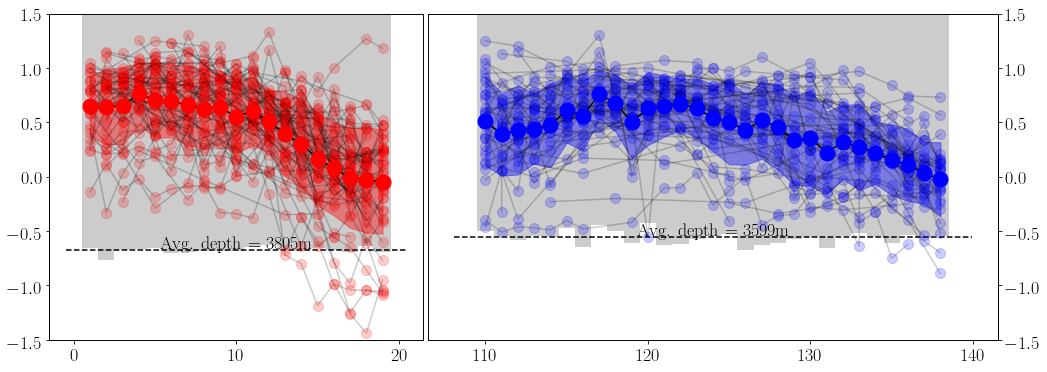

(2504.0, 5105.0)


In [68]:
# plot it
fig = plt.figure(figsize=(total_graph_width, 6))
plt.subplots_adjust(wspace=0.01)
gs = gridspec.GridSpec(1, 2, width_ratios=[width_hol, width_lig]) 
axHD = plt.subplot(gs[0])
axLD = plt.subplot(gs[1])

# Create new axes for plotting depth bins

axHC = axHD.twinx()
axLC = axLD.twinx()

df_hol = Hol_deeper_samples
df_lig = LIG_deeper_samples

############ Hol ##################
# Plot all of the points inside a region on a time-d13C plot

unique_lats = np.unique(df_hol['Lat'])
years_list = np.unique(df_hol.lower)

interpolated_proxies = {}

for unique_lat in unique_lats:
    
    # get a single proxy
    df_temp = df_hol[df_hol['Lat'] == unique_lat]
    
    axHC.plot(df_temp.lower, df_temp.d13C, 'k', df_temp.lower, df_temp.d13C, 'ro', alpha=0.2, ms=10)
    
# Plot the average of all the cores onto the same plot with stdev shaded region around it

averaged_points_hol = df_hol.groupby('lower').mean()
stdev_points_hol = df_hol.groupby('lower').std()

axHC.fill_between(averaged_points_hol.index,
                 averaged_points_hol.d13C-stdev_points_hol.d13C,
                 averaged_points_hol.d13C+stdev_points_hol.d13C,
                 zorder=-100,
                 color='r',
                 alpha=0.4)


axHC.plot(averaged_points_hol.index, averaged_points_hol.d13C, 'k',
         averaged_points_hol.index, averaged_points_hol.d13C, 'ro',
         zorder=100,
         ms=15)

############ LIG ##################
# Plot all of the points inside a region on a time-d13C plot

unique_lats = np.unique(df_lig['Lat'])
years_list = np.unique(df_lig.lower)

interpolated_proxies = {}

for unique_lat in unique_lats:
    
    # get a single proxy
    df_temp = df_lig[df_lig['Lat'] == unique_lat]
    
    axLC.plot(df_temp.lower, df_temp.d13C, 'k', df_temp.lower, df_temp.d13C, 'bo', alpha=0.2, ms=10)
    
# Plot the average of all the cores onto the same plot with stdev shaded region around it

averaged_points_lig = df_lig.groupby('lower').mean()
stdev_points_lig = df_lig.groupby('lower').std()

axLC.fill_between(averaged_points_lig.index,
                 averaged_points_lig.d13C-stdev_points_lig.d13C,
                 averaged_points_lig.d13C+stdev_points_lig.d13C,
                 zorder=-100,
                 color='b',
                 alpha=0.4)


axLC.plot(averaged_points_lig.index, averaged_points_lig.d13C, 'k',
         averaged_points_lig.index, averaged_points_lig.d13C, 'bo',
         zorder=100,
         ms=15)

#######################

## Make axes the same
d13C_list = pd.concat([df_hol, df_lig]).d13C
d13C_min = np.min(d13C_list)
d13C_max = np.max(d13C_list)

# Round these numbers up to the nearest 0.25
d13C_min = -(math.trunc(-d13C_min) + math.ceil((-d13C_min)%1 * 4) /4)
d13C_max = math.trunc(d13C_max) + math.ceil(d13C_max%1 * 4) /4

axHC.set_ylim(d13C_min, d13C_max)
axLC.set_ylim(d13C_min, d13C_max)

# Plot the depth bars

axHD.bar(averaged_points_hol.index, averaged_points_hol.Ocean_depth,width=slice_width,zorder=-10000,color='0.8')
axLD.bar(averaged_points_lig.index, averaged_points_lig.Ocean_depth,width=slice_width,zorder=-10000,color='0.8')

# Format the axes

axLD.get_yaxis().set_visible(False)
axHD.get_yaxis().set_visible(False)

axHC.yaxis.set_label_position("left")
axHC.yaxis.tick_left()
axLC.yaxis.set_label_position("right")
axLC.yaxis.tick_right()

# Adjust depth axes

depth_list = list(pd.concat([df_hol, df_lig])['Ocean_depth'])

dep_min = np.nanmin(depth_list)
dep_max = np.nanmax(depth_list)

axHD.set_ylim(math.ceil(float(dep_max) / 250)*250, 0)
axLD.set_ylim(math.ceil(float(dep_max) / 250)*250, 0)

mean_Hol_depth = np.mean(df_hol.Ocean_depth)
mean_LIG_depth = np.mean(df_lig.Ocean_depth)

axHD.plot(axHD.get_xlim(), [mean_Hol_depth,mean_Hol_depth],'k--')
axLD.plot(axLD.get_xlim(), [mean_LIG_depth,mean_LIG_depth],'k--')

axHD.text(np.mean(axHD.get_xlim()), mean_Hol_depth, 'Avg. depth = ' + str(int(mean_Hol_depth))+'m', ha='center')
axLD.text(np.mean(axLD.get_xlim()), mean_LIG_depth, 'Avg. depth = ' + str(int(mean_LIG_depth))+'m', ha='center')

# Plot

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 25}

matplotlib.rc('font', **font)

plt.show()

print(np.min(pd.concat([df_hol, df_lig]).Ocean_depth), np.max(pd.concat([df_hol, df_lig]).Ocean_depth))

# Regional Analysis

In [69]:
# NE Atlantic

NE_lat_min = 41
NE_lat_max = 58
NE_lon_min = -32
NE_lon_max = -15

# Namibian coast

NB_lat_min = -28
NB_lat_max = -18
NB_lon_min = 4
NB_lon_max = 15

# Equatorial Atlantic

MA_lat_min = -7
MA_lat_max = 3
MA_lon_min = -18
MA_lon_max = -5

# get dataframes of data that are in the selected regions to compare across the Holocene and the LIG

def area_filter(df, lon_min, lon_max, lat_min, lat_max):
    
    df = df[(df.Lon > lon_min) & (df.Lon < lon_max) & (df.Lat < lat_max) & (df.Lat > lat_min)]
    
    return(df)

NE_Hol_cores = area_filter(Hol_deeper_samples, NE_lon_min, NE_lon_max, NE_lat_min, NE_lat_max)
NB_Hol_cores = area_filter(Hol_deeper_samples, NB_lon_min, NB_lon_max, NB_lat_min, NB_lat_max)
MA_Hol_cores = area_filter(Hol_deeper_samples, MA_lon_min, MA_lon_max, MA_lat_min, MA_lat_max)

NE_LIG_cores = area_filter(LIG_deeper_samples, NE_lon_min, NE_lon_max, NE_lat_min, NE_lat_max)
NB_LIG_cores = area_filter(LIG_deeper_samples, NB_lon_min, NB_lon_max, NB_lat_min, NB_lat_max)
MA_LIG_cores = area_filter(LIG_deeper_samples, MA_lon_min, MA_lon_max, MA_lat_min, MA_lat_max)

NE_Hol_cores_shallower = area_filter(Hol_shallower_samples, NE_lon_min, NE_lon_max, NE_lat_min, NE_lat_max)
NB_Hol_cores_shallower = area_filter(Hol_shallower_samples, NB_lon_min, NB_lon_max, NB_lat_min, NB_lat_max)
MA_Hol_cores_shallower = area_filter(Hol_shallower_samples, MA_lon_min, MA_lon_max, MA_lat_min, MA_lat_max)

NE_LIG_cores_shallower = area_filter(LIG_shallower_samples, NE_lon_min, NE_lon_max, NE_lat_min, NE_lat_max)
NB_LIG_cores_shallower = area_filter(LIG_shallower_samples, NB_lon_min, NB_lon_max, NB_lat_min, NB_lat_max)
MA_LIG_cores_shallower = area_filter(LIG_shallower_samples, MA_lon_min, MA_lon_max, MA_lat_min, MA_lat_max)

# Slice heatmap for T-test

In [70]:
# # Setup the bounds of the moving slice
# Hol_time_min = 2
# Hol_time_max = 10
# Hol_time_step = 1
# Hol_time_slice_width = 5

# LIG_time_min = 116
# LIG_time_max = 129
# LIG_time_step = 1
# LIG_time_slice_width = 5

# # List of slices
# Hol_time_list = [(x,y) for x,y in zip(np.arange(Hol_time_min, Hol_time_max, Hol_time_step), np.arange(Hol_time_min, Hol_time_max, Hol_time_step)+Hol_time_slice_width)]
# LIG_time_list = [(x,y) for x,y in zip(np.arange(LIG_time_min, LIG_time_max, LIG_time_step), np.arange(LIG_time_min, LIG_time_max, LIG_time_step)+LIG_time_slice_width)]


# def heatmap(Hol_cores,LIG_cores):
#     # Evaluate the p-value over every combination of the slices
#     pvalue_results = {}

#     for Hol_time in Hol_time_list:
#         for LIG_time in LIG_time_list:
#             Hol_temp = Hol_cores[(Hol_cores.lower > Hol_time[0]) & (Hol_cores.lower < Hol_time[1])]
#             LIG_temp = LIG_cores[(LIG_cores.lower > LIG_time[0]) & (LIG_cores.lower < LIG_time[1])]

#             pvalue_results.update({
#                 str((Hol_time,LIG_time)) : stats.ttest_ind(Hol_temp.d13C, LIG_temp.d13C).pvalue
#             })

#     # Convert the dictionary of results to a dataframe
#     pvalue_results = pd.DataFrame.from_dict(pvalue_results,orient='index')

#     # # Format the indecies, and separate into different columns
#     pvalue_results[['Holocene','LIG']] = pd.DataFrame([[re.sub('[^0-9,]','', y) for y in x.split('), (')] for x in pvalue_results.index],index=pvalue_results.index)
#     pvalue_results = pvalue_results.rename(columns={0:'pvalue'})

#     # Pivot the dataframe, so that it can be plotted as a heatmap
#     pvalue_results_pivot = pd.DataFrame.pivot(pvalue_results, index='Holocene', columns='LIG', values='pvalue')
#     pvalue_results = pd.DataFrame.as_matrix(pvalue_results_pivot)
#     my_index = pvalue_results_pivot.index
#     my_columns = pvalue_results_pivot.columns
    
#     return(pvalue_results,my_index,my_columns)

# NE_pvalue_results,NE_index,NE_columns = heatmap(NE_Hol_cores,NE_LIG_cores)
# MA_pvalue_results,MA_index,MA_columns = heatmap(MA_Hol_cores,MA_LIG_cores)
# NB_pvalue_results,NB_index,NB_columns = heatmap(NB_Hol_cores,NB_LIG_cores)


In [71]:
# # Visualise the summary statistics

# fig = plt.figure(figsize=(20, 25))
# fig.subplots_adjust(hspace=0.5)

# gs = gridspec.GridSpec(3, 1) 
# ax1 = plt.subplot(gs[0])
# ax2 = plt.subplot(gs[1])
# ax3 = plt.subplot(gs[2])

# ax_list = [ax1, ax2, ax3]

# # get the largest pvalue so that all subplot have the same vmin,vmax
# largest_pvalue = np.max([NE_pvalue_results,MA_pvalue_results,NB_pvalue_results])

# for pvalue_results,my_index,my_columns,ax in zip([NE_pvalue_results,MA_pvalue_results,NB_pvalue_results],
#                                                  [NE_index,MA_index,NB_index],
#                                                  [NE_columns,MA_columns,NB_columns],
#                                                  [ax1,ax2,ax3]):

#     im = ax.imshow(pvalue_results,
#                    cmap='Reds',
#                    vmin = 0.05,
#                    vmax = 1.00)

#     # We want to show all ticks...
#     ax.set_xticks(np.arange(len(my_columns)))
#     ax.set_yticks(np.arange(len(my_index)))
#     # ... and label them with the respective list entries
#     ax.set_xticklabels(my_columns)
#     ax.set_yticklabels(my_index)

#     # Rotate the tick labels and set their alignment.
#     plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
#              rotation_mode="anchor")

#     # Loop over data dimensions and create text annotations.
#     for i in range(len(my_index)):
#         for j in range(len(my_columns)):
#             text = ax.text(j, i, int(pvalue_results[i, j]*100.0)/100.0,
#                            ha="center", va="center", color="k")

# ax1.set_title("North East Atlantic")
# ax2.set_title("Mid Atlantic")
# ax3.set_title("Namibian coast")

# # plt.legend(ax1)

# plt.show()

# Regional Summary Plot

In [72]:
NE_Hol_deglaciation = NE_Hol_cores.copy()
NB_Hol_deglaciation = NB_Hol_cores.copy()
MA_Hol_deglaciation = MA_Hol_cores.copy()
NE_LIG_deglaciation = NE_LIG_cores.copy()
NB_LIG_deglaciation = NB_LIG_cores.copy()
MA_LIG_deglaciation = MA_LIG_cores.copy()

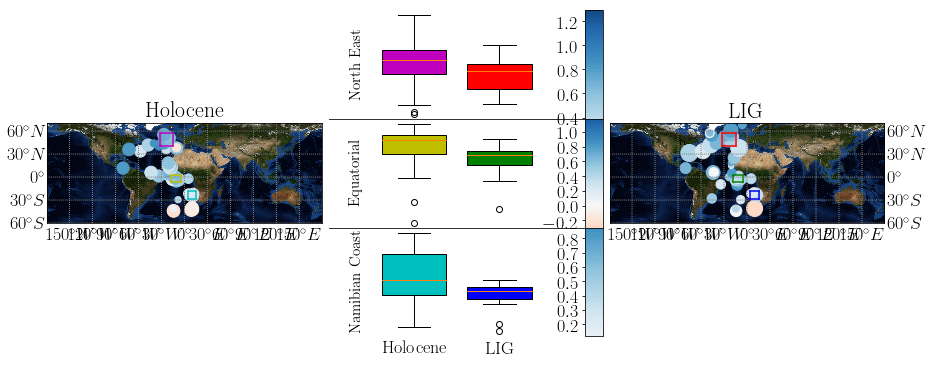

In [73]:
# Get just the peaks 

NE_Hol_cores = NE_Hol_cores[(NE_Hol_cores.lower > Hol_max_limits[0]) & (NE_Hol_cores.lower < Hol_max_limits[1])]
NB_Hol_cores = NB_Hol_cores[(NB_Hol_cores.lower > Hol_max_limits[0]) & (NB_Hol_cores.lower < Hol_max_limits[1])]
MA_Hol_cores = MA_Hol_cores[(MA_Hol_cores.lower > Hol_max_limits[0]) & (MA_Hol_cores.lower < Hol_max_limits[1])]
NE_LIG_cores = NE_LIG_cores[(NE_LIG_cores.lower > LIG_max_limits[0]) & (NE_LIG_cores.lower < LIG_max_limits[1])]
NB_LIG_cores = NB_LIG_cores[(NB_LIG_cores.lower > LIG_max_limits[0]) & (NB_LIG_cores.lower < LIG_max_limits[1])]
MA_LIG_cores = MA_LIG_cores[(MA_LIG_cores.lower > LIG_max_limits[0]) & (MA_LIG_cores.lower < LIG_max_limits[1])]

# Get the bounds for the scatter graphs and box plots

all_deeper_samples = pd.concat([Hol_deeper_samples, LIG_deeper_samples])
vmin = all_deeper_samples.d13C.min()
vmax = all_deeper_samples.d13C.max()
vmax = np.max([abs(vmin),abs(vmax)])
vmin = -vmax

# set up plot

point_size_multiplier = 10

# plot it

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

fig = plt.figure(figsize=(15,10))
fig.subplots_adjust(wspace=0.025,hspace=0)

axHC = plt.subplot2grid((5,3),(0,0),rowspan=5)
axLC = plt.subplot2grid((5,3),(0,2),rowspan=5)

axStat1 = plt.subplot2grid((5,3),(1,1))
axStat2 = plt.subplot2grid((5,3),(2,1))
axStat3 = plt.subplot2grid((5,3),(3,1))

########### Holocene ###############

Hol_cores_averaged = Hol_deeper_samples.groupby(['Lat','Lon','Ocean_depth']).mean().reset_index()
Hol_cores_stdev = Hol_deeper_samples.groupby(['Lat','Lon','Ocean_depth']).std().reset_index()

Hol_scatter = axHC.scatter(Hol_cores_averaged.Lon, Hol_cores_averaged.Lat, c=Hol_cores_averaged.d13C,
           s=Hol_deeper_samples.groupby(['Lat','Lon','Ocean_depth']).count().reset_index().d13C*point_size_multiplier,
                          vmin=vmin,vmax=vmax,cmap='RdBu')

m = Basemap(ax = axHC, resolution = None, llcrnrlon = -179, urcrnrlon = 179, llcrnrlat = -60, urcrnrlat = 70)
m.bluemarble(scale=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,1],color='0.5',zorder=1)
m.drawparallels(np.arange(-90,90,30),labels=[1,0,0,0],color='0.5',zorder=2)

########### LIG ###############

LIG_cores_averaged = LIG_deeper_samples.groupby(['Lat','Lon','Ocean_depth']).mean().reset_index()
LIG_cores_stdev = LIG_deeper_samples.groupby(['Lat','Lon','Ocean_depth']).std().reset_index()

LIG_scatter = axLC.scatter(LIG_cores_averaged.Lon, LIG_cores_averaged.Lat, c=LIG_cores_averaged.d13C,
           s=LIG_deeper_samples.groupby(['Lat','Lon','Ocean_depth']).count().reset_index().d13C*point_size_multiplier,
                          vmin=vmin,vmax=vmax,cmap='RdBu')

m = Basemap(ax = axLC, resolution = None, llcrnrlon = -179, urcrnrlon = 179, llcrnrlat = -60, urcrnrlat = 70)
m.bluemarble(scale=0.5)
m.drawmeridians(np.arange(0,360,30),labels=[0,0,0,1],color='0.5',zorder=1)
m.drawparallels(np.arange(-90,90,30),labels=[0,1,0,0],color='0.5',zorder=2)

################# Define regions

# Function for plotting box regions

def box_plot(ax, lon_min, lon_max, lat_min, lat_max, col):
    ax.plot([lon_min, lon_max], [lat_min, lat_min],c=col)
    ax.plot([lon_min, lon_max], [lat_max, lat_max],c=col)
    ax.plot([lon_min, lon_min], [lat_min, lat_max],c=col)
    ax.plot([lon_max, lon_max], [lat_min, lat_max],c=col)

NE_Hol_color = 'm'
NE_LIG_color = 'r'
MA_Hol_color = 'y'
MA_LIG_color = 'g'
NB_Hol_color = 'c'
NB_LIG_color = 'b'

region_colors = [NE_Hol_color,NE_LIG_color,MA_Hol_color,MA_LIG_color,NB_Hol_color,NB_LIG_color]

box_plot(axHC, NE_lon_min, NE_lon_max, NE_lat_min, NE_lat_max,NE_Hol_color)
box_plot(axHC, NB_lon_min, NB_lon_max, NB_lat_min, NB_lat_max,NB_Hol_color)
box_plot(axHC, MA_lon_min, MA_lon_max, MA_lat_min, MA_lat_max,MA_Hol_color)
box_plot(axLC, NE_lon_min, NE_lon_max, NE_lat_min, NE_lat_max,NE_LIG_color)
box_plot(axLC, NB_lon_min, NB_lon_max, NB_lat_min, NB_lat_max,NB_LIG_color)
box_plot(axLC, MA_lon_min, MA_lon_max, MA_lat_min, MA_lat_max,MA_LIG_color)

################# 

# Boxplots

distance = 0.2

bp1 = axStat1.boxplot(NE_Hol_cores.d13C,positions=[0],patch_artist=True)
bp2 = axStat1.boxplot(NE_LIG_cores.d13C,positions=[distance],patch_artist=True)
bp3 = axStat2.boxplot(MA_Hol_cores.d13C,positions=[0],patch_artist=True)
bp4 = axStat2.boxplot(MA_LIG_cores.d13C,positions=[distance],patch_artist=True)
bp5 = axStat3.boxplot(NB_Hol_cores.d13C,positions=[0],patch_artist=True)
bp6 = axStat3.boxplot(NB_LIG_cores.d13C,positions=[distance],patch_artist=True)

# fill with colors
for box,color in zip([bp1['boxes'],bp2['boxes'],bp3['boxes'],bp4['boxes'],bp5['boxes'],bp6['boxes']],
                     region_colors):
    for patch in box:
        patch.set_facecolor(color)

axStat1.spines['top'].set_visible(False)
axStat3.spines['bottom'].set_visible(False)
axStat1.spines['left'].set_visible(False)
axStat1.spines['right'].set_visible(False)
axStat2.spines['left'].set_visible(False)
axStat2.spines['right'].set_visible(False)
axStat3.spines['left'].set_visible(False)
axStat3.spines['right'].set_visible(False)

# Format the graph

axStat1.set_xlim(-distance,2*distance)
axStat2.set_xlim(-distance,2*distance)
axStat3.set_xlim(-distance,2*distance)

#axStat.set_ylabel(r'$\delta^{13}$C ($\permil$)')

axStat1.set_xticklabels([])
axStat2.set_xticklabels([])
axStat3.set_xticks([0,distance])
axStat3.tick_params(axis=u'x', length=0)

axStat3.set_xticklabels(['Holocene', 'LIG'])
axHC.set_title('Holocene')
axLC.set_title('LIG')

pad=-35
for ax in [axStat1,axStat2,axStat3]:
    ax.tick_params(axis="y",direction="in", pad=pad)
    ax.yaxis.set_ticklabels([])
    ax.yaxis.set_ticks([])
    
    min_frac = (ax.get_ylim()[0]-vmin)/np.diff([vmin,vmax])
    max_frac = (ax.get_ylim()[1]-vmin)/np.diff([vmin,vmax])
    newcmap = ListedColormap(plt.get_cmap('RdBu')(np.linspace(min_frac, max_frac)))
    cbar1 = ax.scatter([],[],c=[],s=[],
                            vmin=ax.get_ylim()[0],vmax=ax.get_ylim()[1],cmap=newcmap)
    divider = make_axes_locatable(ax)
    divider = divider.append_axes("right", size="7%", pad="0%")
    cbar = plt.colorbar(cbar1,cax=divider,pad='0%')
    divider.yaxis.set_ticks_position('left')

fontshrink = 3
axStat1.set_ylabel('North East',labelpad=pad,fontsize=fontsize-fontshrink)
axStat2.set_ylabel('Equatorial',labelpad=pad,fontsize=fontsize-fontshrink)
axStat3.set_ylabel('Namibian Coast',labelpad=pad,fontsize=fontsize-fontshrink)

height = 0.3
bottom = 0.5-height/2
left = 0.95
width = 0.025

# cax = fig.add_axes([left,bottom, width, height])
# plt.colorbar(Hol_scatter,cax=cax)

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : fontsize}

matplotlib.rc('font', **font)

fig.savefig('../Figures/Atlantic_spatial_plot.png',bbox_inches='tight')

plt.show()


In [64]:
df[df['Location'] != 'Atlantic']

,Core,Location,Lat,Lon,Dep,d13C,age
978,RC12-339,Indian,9.133,90.033,3010.0,0.1400,110.230769
979,RC12-339,Indian,9.133,90.033,3010.0,0.1300,116.923077
980,RC12-339,Indian,9.133,90.033,3010.0,0.0800,118.038461
981,RC12-339,Indian,9.133,90.033,3010.0,0.1600,119.153846
982,RC12-339,Indian,9.133,90.033,3010.0,-0.1100,120.269231
983,RC12-339,Indian,9.133,90.033,3010.0,-0.1900,121.384615
984,RC12-339,Indian,9.133,90.033,3010.0,-0.1900,122.500000
985,RC12-339,Indian,9.133,90.033,3010.0,-0.1900,123.615385
986,RC12-339,Indian,9.133,90.033,3010.0,-0.0600,124.730769
987,RC12-339,Indian,9.133,90.033,3010.0,-0.8800,125.846154


In [43]:
Hol_deeper_samples[Hol_deeper_samples['Lat']  == 36.467]


,lower,Lat,Lon,Ocean_depth,d13C,count
89,2,36.467,177.167,3623.0,0.05,1.0
751,11,36.467,177.167,3623.0,0.05,1.0
1001,14,36.467,177.167,3623.0,-0.24,1.0
1084,15,36.467,177.167,3623.0,-0.59,1.0
1348,18,36.467,177.167,3623.0,-0.09,1.0
1440,19,36.467,177.167,3623.0,-0.18,1.0


In [29]:
from PIL import Image

def rotate(image_path, degrees_to_rotate, saved_location):
    """
    Rotate the given photo the amount of given degreesk, show it and save it
    @param image_path: The path to the image to edit
    @param degrees_to_rotate: The number of degrees to rotate the image
    @param saved_location: Path to save the cropped image
    """

    image_obj = Image.open(image_path)
    rotated_image = image_obj.rotate(degrees_to_rotate)
    rotated_image.save(saved_location)
    image_obj.show()
    
rotate('../Figures/Atlantic_spatial_plot.png',90,'../Figures/Atlantic_spatial_plot.png')
    

In [ ]:
caption = [
    'Atlantic benthic foraminifera $\delta^{13}$C ($\permil$) (ka BP) during the Holocene and LIG depicted spatially.',
    'Three specific regions are highlighted during the Holocene and LIG:',
    'The North East (magenta, red), Equatorial (yellow, green), and Namibian Coast (cyan, blue).',
    'In the centre, box plots are given for each region (filled colours match to region outline colours).',
    'The $\delta^{13}$C colourbars ($\permil$) function as both the box plot y-axis and the spatial plot colourbar.',
    'The size of the points represents the numbers of data points.'
]

caption = ' '.join(caption)

# Write to a file
file1 = open("../Figures/Atlantic_spatial_plot_caption.tex","w") 
file1.write(caption) 
file1.close() #to change file access modes

# Deeper cores time series

In [ ]:

fig = plt.figure(figsize=(total_graph_width, 20))
plt.subplots_adjust(wspace=0.01,hspace=0)
gs = gridspec.GridSpec(3, 2, width_ratios=[width_hol, width_lig]) 

ax1D = plt.subplot(gs[0])
ax2D = plt.subplot(gs[1])
ax3D = plt.subplot(gs[2])
ax4D = plt.subplot(gs[3])
ax5D = plt.subplot(gs[4])
ax6D = plt.subplot(gs[5])

ax1C = ax1D.twinx()
ax2C = ax2D.twinx()
ax3C = ax3D.twinx()
ax4C = ax4D.twinx()
ax5C = ax5D.twinx()
ax6C = ax6D.twinx()

####################################################################################################
####################################################################################################
####################################################################################################

def deglaciation_plot(axC,axD,df,color_format):

    #  Find the average stats
    averaged_points = df.groupby('lower').mean()
    stdev_points = df.groupby('lower').std()    
    
    #  Plot depth bars
    axD.bar(averaged_points.index, averaged_points.Ocean_depth,yerr=stdev_points.Ocean_depth,capsize=4,width=slice_width,zorder=-10000,color='0.8')

    unique_lats = np.unique(df['Lat'])
    years_list = np.unique(df.lower)

    interpolated_proxies = {}

    for unique_lat in unique_lats:

        # get a single proxy
        df_temp = df[df['Lat'] == unique_lat]

        axC.plot(df_temp.lower, df_temp.d13C, 'k', df_temp.lower, df_temp.d13C, color_format, alpha=0.2, ms=10)
    
    # Plot the average of all the cores onto the same plot with stdev shaded region around it

    axC.fill_between(averaged_points.index,
                     averaged_points.d13C-stdev_points.d13C,
                     averaged_points.d13C+stdev_points.d13C,
                     zorder=-100,
                     color=color_format[0],
                     alpha=0.4)

    tol = 300
    df_shallow = averaged_points[averaged_points.Ocean_depth < (np.mean(df.Ocean_depth)-tol)]
    df_deep = averaged_points[averaged_points.Ocean_depth > (np.mean(df.Ocean_depth)+tol)]
    df_mid = averaged_points[(averaged_points.Ocean_depth < (np.mean(df.Ocean_depth))+tol) & (averaged_points.Ocean_depth > (np.mean(df.Ocean_depth)-tol))]
    
    for df_dep,marker in zip([df_shallow,df_mid,df_deep],['^','s','v']):
        axC.scatter(df_dep.index, df_dep.d13C, c='k',
                    marker=marker,
                    zorder=100,
                    s=100)
    
    # Axes adjust
    
    axC.set_ylim(d13C_min, d13C_max)
    axC.yaxis.set_label_position("left")
    axC.yaxis.tick_left()
    
    axD.set_ylim(5000, 0)

    # Plot the average lines
    
    #axD.plot(axD.get_xlim(), [np.mean(df.Ocean_depth),np.mean(df.Ocean_depth)],'k--')

    #axD.text(np.mean(axD.get_xlim()), np.mean(df.Ocean_depth), 'Avg. depth = ' + str(int(np.mean(df.Ocean_depth)))+'m', ha='center')
    

    
####################################################################################################
####################################################################################################
####################################################################################################

Hol_format = 'ro'
LIG_format = 'bo'

cores_dfs = [NE_Hol_deglaciation,NE_LIG_deglaciation,NB_Hol_deglaciation,NB_LIG_deglaciation,MA_Hol_deglaciation,MA_LIG_deglaciation]

## Make axes the same
d13C_list = pd.concat(cores_dfs).d13C
d13C_min = np.min(d13C_list)
d13C_max = np.max(d13C_list)
d13C_min = -(math.trunc(-d13C_min) + math.ceil((-d13C_min)%1 * 4) /4)
d13C_max = math.trunc(d13C_max) + math.ceil(d13C_max%1 * 4) /4

####################################################################################################
####################################################################################################
####################################################################################################

for axC,axD,df,color_format in zip([ax1C,ax2C,ax3C,ax4C,ax5C,ax6C],
                                   [ax1D,ax2D,ax3D,ax4D,ax5D,ax6D],
                                   cores_dfs,
                                   [Hol_format,LIG_format,Hol_format,LIG_format,Hol_format,LIG_format]):

    deglaciation_plot(axC,axD,df,color_format)

for ax in [ax2D,ax4D,ax6D]:
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
for ax in [ax1D,ax3D,ax5D]:
    ax.get_yaxis().set_visible(False)
    
for ax in [ax2C,ax4C,ax6C]:
    ax.get_yaxis().set_visible(False)
    
for ax in[ax1C,ax2C,ax3C,ax4C]:
    ax.set_xticklabels([])
    
ax1C.set_ylabel('North East $\delta^{13}$C ($\permil$)')
ax3C.set_ylabel('Equatorial $\delta^{13}$C ($\permil$)')
ax5C.set_ylabel('Namibian Coast $\delta^{13}$C ($\permil$)')

ax2D.set_ylabel('Depth (m)')
ax4D.set_ylabel('Depth (m)')
ax6D.set_ylabel('Depth (m)')

ax1C.set_title('Holocene')
ax2C.set_title('Last Interglacial')

ax5C.set_xlabel('Time (kaBP)')
ax6C.set_xlabel('Time (kaBP)')

for ax,letter in zip([ax1C,ax2C,ax3C,ax4C,ax5C,ax6C],['a)','b)','c)','d)','e)','f)']):
    ax.text(ax.get_xlim()[0] + 0.05*np.diff(ax.get_xlim()),ax.get_ylim()[0] + 0.05*np.diff(ax.get_ylim()),letter)

####################################################################################################
####################################################################################################
####################################################################################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)


plt.savefig('../Figures/Atlantic_regional_comparison.png')

plt.show()


In [ ]:
caption = [
    'Atlantic benthic foraminifera $\delta^{13}$C (left y-axis, $\permil$) during the Holocene and LIG for the previously defined regions;',
    'North East, Equatorial, and Namibian Coast.',
    'Data is presented in discrete slices spanning {} years'.format(slice_width*1000),
    'Circular, transparent points connected by lines are individual proxies.',
    'Black points represent $\delta^{13}$C.',
    'For each slice, there is a corresponding averaged depth (right y-axis, m), with 1 standard deviation either side shown in the bars.',
    'Average points with a average slice depth within $\pm${}m of the mean core depth across all slices is represented with a square point.'.format(tol),
    'However, if the average slice depth shallower than {}m is shown in a upward triangle, and deeper than {}m is shown in a downward triangle.'.format(tol,tol),
    'Shading shows 1 standard deviation either side of the mean (where more than 1 points exists)'
]

caption = ' '.join(caption)

# Write to a file
file1 = open("../Figures/Atlantic_regional_comparison_caption.tex","w") 
file1.write(caption) 
file1.close() #to change file access modes

# Deeper cores T-test

In [ ]:
# Run and view the results of the t-test
print('North East Atlantic P-value: {}'.format(stats.ttest_ind(NE_Hol_cores.d13C, NE_LIG_cores.d13C).pvalue))
print('Mid Atlantic P-value: {}'.format(stats.ttest_ind(MA_Hol_cores.d13C, MA_LIG_cores.d13C).pvalue))
print('Namibian Coast P-value: {}'.format(stats.ttest_ind(NB_Hol_cores.d13C, NB_LIG_cores.d13C).pvalue))

# Shallower cores time series

In [ ]:

fig = plt.figure(figsize=(total_graph_width, 20))
plt.subplots_adjust(wspace=0.01,hspace=0)
gs = gridspec.GridSpec(3, 2, width_ratios=[width_hol, width_lig]) 

ax1D = plt.subplot(gs[0])
ax2D = plt.subplot(gs[1])
ax3D = plt.subplot(gs[2])
ax4D = plt.subplot(gs[3])
ax5D = plt.subplot(gs[4])
ax6D = plt.subplot(gs[5])

ax1C = ax1D.twinx()
ax2C = ax2D.twinx()
ax3C = ax3D.twinx()
ax4C = ax4D.twinx()
ax5C = ax5D.twinx()
ax6C = ax6D.twinx()

####################################################################################################
####################################################################################################
####################################################################################################

def deglaciation_plot(axC,axD,df,color_format):

    #  Find the average stats
    averaged_points = df.groupby('lower').mean()
    stdev_points = df.groupby('lower').std()    
    
    #  Plot depth bars
    axD.bar(averaged_points.index, averaged_points.Ocean_depth,yerr=stdev_points.Ocean_depth,capsize=4,width=slice_width,zorder=-10000,color='0.8')

    unique_lats = np.unique(df['Lat'])
    years_list = np.unique(df.lower)

    interpolated_proxies = {}

    for unique_lat in unique_lats:

        # get a single proxy
        df_temp = df[df['Lat'] == unique_lat]

        axC.plot(df_temp.lower, df_temp.d13C, 'k', df_temp.lower, df_temp.d13C, color_format, alpha=0.2, ms=10)
    
    # Plot the average of all the cores onto the same plot with stdev shaded region around it

    axC.fill_between(averaged_points.index,
                     averaged_points.d13C-stdev_points.d13C,
                     averaged_points.d13C+stdev_points.d13C,
                     zorder=-100,
                     color=color_format[0],
                     alpha=0.4)

    tol = 300
    df_shallow = averaged_points[averaged_points.Ocean_depth < (np.mean(df.Ocean_depth)-tol)]
    df_deep = averaged_points[averaged_points.Ocean_depth > (np.mean(df.Ocean_depth)+tol)]
    df_mid = averaged_points[(averaged_points.Ocean_depth < (np.mean(df.Ocean_depth))+tol) & (averaged_points.Ocean_depth > (np.mean(df.Ocean_depth)-tol))]
    
    for df_dep,marker in zip([df_shallow,df_mid,df_deep],['^','s','v']):
        axC.scatter(df_dep.index, df_dep.d13C, c='k',
                    marker=marker,
                    zorder=100,
                    s=100)
    
    # Axes adjust
    
    axC.set_ylim(d13C_min, d13C_max)
    axC.yaxis.set_label_position("left")
    axC.yaxis.tick_left()
    
    axD.set_ylim(5000, 0)

    # Plot the average lines
    
    #axD.plot(axD.get_xlim(), [np.mean(df.Ocean_depth),np.mean(df.Ocean_depth)],'k--')

    #axD.text(np.mean(axD.get_xlim()), np.mean(df.Ocean_depth), 'Avg. depth = ' + str(int(np.mean(df.Ocean_depth)))+'m', ha='center')
    

    
####################################################################################################
####################################################################################################
####################################################################################################

Hol_format = 'ro'
LIG_format = 'bo'

cores_dfs = [NE_Hol_deglaciation,NE_LIG_deglaciation,NB_Hol_deglaciation,NB_LIG_deglaciation,MA_Hol_deglaciation,MA_LIG_deglaciation]

## Make axes the same
d13C_list = pd.concat(cores_dfs).d13C
d13C_min = np.min(d13C_list)
d13C_max = np.max(d13C_list)
d13C_min = -(math.trunc(-d13C_min) + math.ceil((-d13C_min)%1 * 4) /4)
d13C_max = math.trunc(d13C_max) + math.ceil(d13C_max%1 * 4) /4

####################################################################################################
####################################################################################################
####################################################################################################

for axC,axD,df,color_format in zip([ax1C,ax2C,ax3C,ax4C,ax5C,ax6C],
                                   [ax1D,ax2D,ax3D,ax4D,ax5D,ax6D],
                                   cores_dfs,
                                   [Hol_format,LIG_format,Hol_format,LIG_format,Hol_format,LIG_format]):

    deglaciation_plot(axC,axD,df,color_format)

for ax in [ax2D,ax4D,ax6D]:
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    
for ax in [ax1D,ax3D,ax5D]:
    ax.get_yaxis().set_visible(False)
    
for ax in [ax2C,ax4C,ax6C]:
    ax.get_yaxis().set_visible(False)
    
for ax in[ax1C,ax2C,ax3C,ax4C]:
    ax.set_xticklabels([])
    
ax1C.set_ylabel('North East $\delta^{13}$C ($\permil$)')
ax3C.set_ylabel('Equatorial $\delta^{13}$C ($\permil$)')
ax5C.set_ylabel('Namibian Coast $\delta^{13}$C ($\permil$)')

ax2D.set_ylabel('Depth (m)')
ax4D.set_ylabel('Depth (m)')
ax6D.set_ylabel('Depth (m)')

ax1C.set_title('Holocene')
ax2C.set_title('Last Interglacial')

ax5C.set_xlabel('Time (kaBP)')
ax6C.set_xlabel('Time (kaBP)')

for ax,letter in zip([ax1C,ax2C,ax3C,ax4C,ax5C,ax6C],['a)','b)','c)','d)','e)','f)']):
    ax.text(ax.get_xlim()[0] + 0.05*np.diff(ax.get_xlim()),ax.get_ylim()[0] + 0.05*np.diff(ax.get_ylim()),letter)

####################################################################################################
####################################################################################################
####################################################################################################

font = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

matplotlib.rc('font', **font)


#plt.savefig('../Figures/Atlantic_regional_comparison.png')

plt.show()
